## networks on a computer - the networkx module

You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This tutorial takes you through a few basic examples and exercises.


In [13]:
!pip install networkx

In [2]:
import networkx as nx
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import os
# %matplotlib inline

### access your (gdrive) folder to load additional data sources

In [3]:
# Run this only in Colab environment
from google.colab import drive
drive.mount('/content/gdrive')

###### Change Path to the location of the data folder ######
path = '/content/gdrive/My Drive/Obsidian Vault/Obsidian Vault/Courses/Teaching/Grafy, grafové algoritmy a optimalizácia/practice/data/'

###############################################################
# for local storage
# import os
# file_dir = os.path.dirname(os.path.realpath('__file__'))
# #For accessing the file inside a sibling folder.
# path = '..\data\\'
# path = os.path.join(file_dir, path)

Mounted at /content/gdrive


In [4]:
print(path)

/content/gdrive/My Drive/Obsidian Vault/Obsidian Vault/Courses/Teaching/Grafy, grafové algoritmy a optimalizácia/practice/data/


### about the networkx module

they also have a decent [documentation here](https://networkx.org/documentation/stable/tutorial.html)

### Creating and drawing undirected graphs

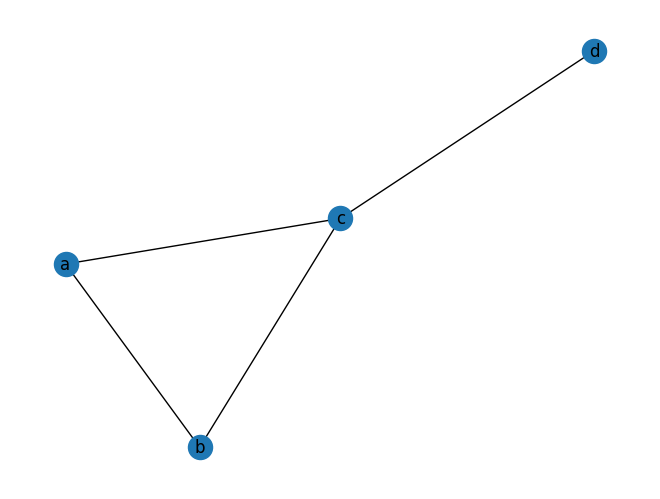

In [5]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

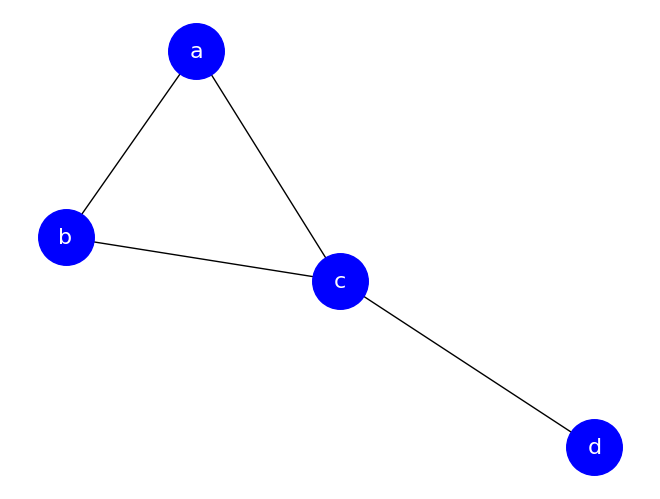

In [6]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

### A note on naming conventions

Usually in Python, variables are named in `snake_case`, i.e. lowercase with underscores separating words. Classes are conventionally named in `CamelCase`, i.e. with the first letter of each word capitalized.

Obviously NetworkX doesn't use this convention, often using single capital letters for the names of graphs. This is an example of convention leaking from the world of discrete mathematics. Since most of the documentation you will find online uses this convention, we will follow it as well.

### Graph methods

The graph object has some properties and methods giving data about the whole graph.

In [7]:
# List all of the nodes
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [8]:
# List all of the edges
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

NodeView and EdgeView objects have iterators, so we can use them in `for` loops:

In [9]:
for node in G.nodes:
    print(node)

a
b
c
d


In [10]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


Note that the edges are given as 2-tuples, the same way we entered them.

We can get the number of nodes and edges in a graph using the `number_of_` methods.

In [ ]:
G.number_of_nodes()

In [ ]:
G.number_of_edges()

Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

In [ ]:
# list of neighbors of node 'b'
G.neighbors('b')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [ ]:
for neighbor in G.neighbors('b'):
    print(neighbor)

and you can always use the `list` constructor to make a list from an iterator:

In [ ]:
list(G.neighbors('b'))

### NetworkX - functions vs. methods

The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [11]:
nx.is_tree(G)

False

In [12]:
nx.is_connected(G)

True

### Node and edge existence

To check if a node is present in a graph, you can use the `has_node()` method:

In [ ]:
G.has_node('a')

In [ ]:
G.has_node('x')

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [ ]:
'd' in G.nodes

Likewise we can check if two nodes are connected by an edge:

In [ ]:
G.has_edge('a', 'b')

In [ ]:
G.has_edge('a', 'd')

In [ ]:
('c', 'd') in G.edges

### Node degree

One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [ ]:
len(list(G.neighbors('a')))

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [ ]:
G.degree('a')

---
# EXERCISE 1
Often in the context of trees, a node with degree 1 is called a *leaf*.

(i) Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [ ]:
def get_leaves(G):
    #TODO
    pass

In [ ]:
# example Graph
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

print(get_leaves(G))

# try another Graph made by yourself

In [ ]:
nx.draw(G, with_labels = True)

(ii) Generate a second graph on your own and test your function again.

In [ ]:
G_test = nx.Graph()
G.add_edges_from([
        #TODO
    ])

print(get_leaves(G))

In [ ]:
nx.draw(G_test, with_labels = True)

---

# List comprehension + graphs

In [ ]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

### Node names

The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.

In [ ]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

In [ ]:
print(G.degrees())

### Adjacency lists

One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:
```
a d e
b c
c
d
e
```
the edges are as follows:
```
(a, d)
(a, e)
(b, c)
```
The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

In the `datasets` directory, there is a file called `friends.adjlist`. It's a plain text file, so you can open it on your computer or in GitHub directly. Make sure your path is set correctly.

In [ ]:

print(open(os.path.join(path, 'friends.adjlist')).read())


NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph SG, for social graph.

In [ ]:
SG = nx.read_adjlist(os.path.join(path, 'friends.adjlist'))

We know how to draw this graph:

In [ ]:
nx.draw(SG, node_size=1800, node_color='lightblue', with_labels=True)

And we know how to get information such as the number of friends linked from a node:

In [ ]:
SG.degree('Alice')

---
# EXERCISE 2

Import the karate_elist.txt file using the read_edgelist funtion from networkx.

Draw the network.

---
# EXERCISE 3

(i) Write a function max_degree that takes a graph as its argument, and returns the name and degree of the node with highest degree.

In [ ]:
def max_degree(G):
    # TODO
    pass

In [ ]:
SG = nx.read_adjlist(path + 'friends.adjlist')
print(max_degree(SG))



ii) Write a function `mutual_friends` that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph `SG` drawn above,

    mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in `SG` drawn above.

In [ ]:
def mutual_friends(G, node_1, node_2):
    # TODO
    pass

In [ ]:
SG = nx.read_adjlist(path + 'friends.adjlist')
print(mutual_friends(SG, 'Alice', 'Claire'))
print(mutual_friends(SG, 'George', 'Bob'))
print(mutual_friends(SG, 'Claire', 'George'))

iii) Take the Karate network as an input and find at least one pair of nodes that have mutual friends and one pair without.

---


### degree and degree distribution

we start with a very simple network for which we can actually check the networkx results by looking at the it:

In [ ]:
# G = nx.Graph()

# G.add_nodes_from(['a','b','c','d','e', 'f'])

# G.add_edges_from([('a','b'),('b','c'),('a','c'),('a','d'),('c','e')])


G = nx.Graph()

G.add_nodes_from([i for i in range(1,11)])

G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(3,6),(5,6),(5,7),(7,9),(7,8),(8,9)])

nx.draw(G, with_labels=True)

there are two redundant ways of receiving the degrees:

In [ ]:
# as a method:
print(dict(G.degree()))

# as a function
print(dict(nx.degree(G)))

sorting the nodes according to their degree:

In [ ]:
print(sorted(dict(G.degree()).items()))


simple sorting of the dictionary only leads to a sorting of node names!

There are multiple ways to sort a dictionary by values. One is by the so called
anonymous lambda function:

In [ ]:
print(sorted(dict(G.degree()).items(),key = lambda x: x[1], reverse = True))


reverse = True makes sure that it starts with the highest value

degree distrubution

In [ ]:
# counting the number of neighbors:
l_k = list(dict(G.degree()).values())
print('all occuring degrees: ', l_k)

# the set operation makes entries unique
s_k = set(l_k)
print('set of degrees', s_k)

# # counting the number of neighbors and store it into a dict
dict_k_frequency = {}
for k in s_k:
    dict_k_frequency[k] = l_k.count(k)

print('dictionary with degrees as keys and frequency as values: ', dict_k_frequency)

# note, for larger lists (N>1000) the .count method becomes inefficient
# use the coolection.Counter module instead

In [ ]:
# plot the degree distribution as a bar plot

plt.bar(dict_k_frequency.keys(), dict_k_frequency.values(),width=.4)
plt.xlabel('degree',fontsize = 16)
plt.ylabel('frequency',fontsize = 16)


---
# EXERCISE 4

Write a function that gets a Graph object as input and

returns the average degree and the standard deviation -

Test your function with the karate network.

Plot the degree distribution of the karate network

---

In [ ]:
def avgDegree_std(G):
    # TODO
    pass